In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=129, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=129, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
accuracy, loss = model.evaluate(x_test, y_test)
model.save('digital.model')


Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9214
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0937 - accuracy: 0.9714
INFO:tensorflow:Assets written to: digital.model\assets


1/1 [==============================] - 0s 75ms/step
The Result is 7


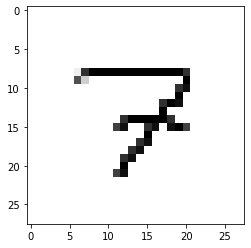

1/1 [==============================] - 0s 15ms/step
The Result is 2


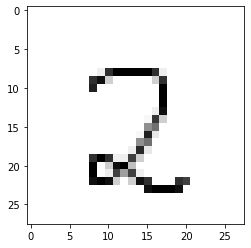

1/1 [==============================] - 0s 15ms/step
The Result is 9


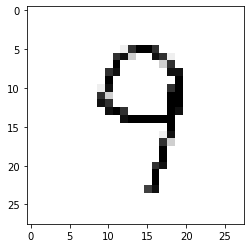

1/1 [==============================] - 0s 15ms/step
The Result is 8


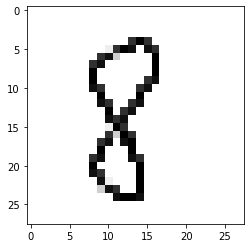

1/1 [==============================] - 0s 14ms/step
The Result is 5


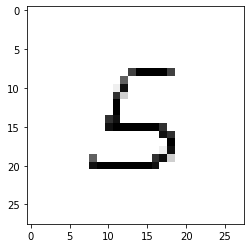

In [6]:
for x in range(1,6):
    img = cv.imread(f'digits/digit{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"The Result is {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()

In [8]:
print(accuracy)

0.09370791912078857
